#  Import Necessary Libraries

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [47]:
# filter Warnings
import warnings
warnings.filterwarnings('ignore')

SQL Connection Code
import mysql.connector

connection = mysql.connector.connect(
    host = 'localhost',
    user= 'root',
    password = 'root',
    database= 'project',
    port = 3306
)


# Read the dataset

In [48]:
df = pd.read_csv('encoded_predictive_maintenance (1).csv')

In [49]:
#df = df.drop('Target', axis=1)

In [50]:
label_encoder = LabelEncoder()

# Encode the 'Failure Type' column
df['Failure Type Encoded'] = label_encoder.fit_transform(df['Failure Type'])

# Display the unique classes and the first few rows with the encoded column
print(df[['Failure Type', 'Failure Type Encoded']].head())
print("Unique classes:", label_encoder.classes_)


  Failure Type  Failure Type Encoded
0   No Failure                     1
1   No Failure                     1
2   No Failure                     1
3   No Failure                     1
4   No Failure                     1
Unique classes: ['Heat Dissipation Failure' 'No Failure' 'Overstrain Failure'
 'Power Failure' 'Random Failures' 'Tool Wear Failure']


In [51]:
# Save the updated DataFrame to a new CSV file
#new_file_path = 'encoded_predictive_maintenance.csv'
#df.to_csv(new_file_path, index=False)

#print(f"File saved successfully as {new_file_path}")


In [52]:
# Get the unique types of failures
unique_failures = df['Failure Type'].unique()
print(f"Unique failure types: {unique_failures}")

# Get the count of each type of failure
failure_counts = df['Failure Type'].value_counts()
print("\nCount of each failure type:\n", failure_counts)


Unique failure types: ['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']

Count of each failure type:
 Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


In [53]:
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,Failure Type Encoded
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure,1
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure,1
2,3,L47182,L,298.1,308.5,1498,49.4,5,No Failure,1
3,4,L47183,L,298.2,308.6,1433,39.5,7,No Failure,1
4,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure,1
5,6,M14865,M,298.1,308.6,1425,41.9,11,No Failure,1
6,7,L47186,L,298.1,308.6,1558,42.4,14,No Failure,1
7,8,L47187,L,298.1,308.6,1527,40.2,16,No Failure,1
8,9,M14868,M,298.3,308.7,1667,28.6,18,No Failure,1
9,10,M14869,M,298.5,309.0,1741,28.0,21,No Failure,1


In [54]:
df.sample(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,Failure Type Encoded
9228,9229,M24088,M,298.1,309.1,1572,37.5,126,No Failure,1
996,997,M15856,M,296.3,307.2,1286,51.1,177,No Failure,1
3651,3652,L50831,L,302.1,311.5,1444,44.9,97,No Failure,1
9800,9801,H39214,H,298.5,309.3,1421,50.3,124,No Failure,1
9242,9243,M24102,M,298.2,308.7,1269,60.9,163,No Failure,1
5113,5114,L52293,L,304.1,313.6,1382,46.7,134,No Failure,1
4342,4343,M19202,M,301.7,309.8,1284,68.2,111,Power Failure,3
9273,9274,H38687,H,298.2,308.7,1520,35.7,40,No Failure,1
7451,7452,L54631,L,300.3,311.8,1508,43.1,57,No Failure,1
3482,3483,L50662,L,301.9,310.8,1540,37.6,83,No Failure,1


# Data Analysis

In [55]:
# Data Shape
df.shape

(10000, 10)

In [56]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Failure Type             10000 non-null  object 
 9   Failure Type Encoded     10000 non-null  int32  
dtypes: float64(3), int32(1), int64(3), object(3)
memory usage: 742.3+ KB


In [57]:
# Data Description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Failure Type Encoded,10000.0,1.03900,0.379069,0.0,1.00,1.0,1.00,5.0


In [58]:
# Data Description of Objective Data Types
df.describe(include= 'object')

,Product ID,Type,Failure Type
count,10000,10000,10000
unique,10000,3,6
top,M14860,L,No Failure
freq,1,6000,9652


In [59]:
# Check Null vales in Data set
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Failure Type               0
Failure Type Encoded       0
dtype: int64

In [60]:
# Check Duplicate values In the Dataset
df.duplicated().sum()


0

In [61]:
# Droping unnecessary columns
df.drop(df.columns[:2], axis=1, inplace= True)

In [62]:
# Check Dataset Shape Again
df.shape

(10000, 8)

In [63]:
# Filtering Categorical Calumns
cat_cols= df.select_dtypes(include= 'O').columns.tolist()

In [64]:
# Print Categorical Columns
cat_cols

['Type', 'Failure Type']

In [65]:
# value counts for categorical columns
for col in cat_cols:
    print(df[col].value_counts())

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


In [66]:
# Identify faulty machines with 'Taregt' value 1

#df_f = df[df.Target==1]
#df_f['Failure Type'].value_counts()

In [67]:
# Drop No failure Rows that shows the Failure But Actually they are not
# idx= df_f[df_f['Failure Type']== 'No Failure'].index
# df.drop(idx, axis=0, inplace= True)


In [68]:
# Identify faulty machines with 'Taregt' value 0

#df_f = df[df.Target==0]
#df_f['Failure Type'].value_counts()

In [69]:
# #Drop Not random Failure Which are not actually Failure
# idx= df_f[df_f['Failure Type']== 'Random Failures'].index
# df.drop(idx, axis=0, inplace= True)


In [70]:
# Shape Check
df.shape

(10000, 8)

In [71]:
# Identify numerical Columns
num_cols= df.select_dtypes(exclude='O').columns.tolist()

In [72]:
num_cols

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Failure Type Encoded']

In [73]:
# Handling the Outliers in data
df.replace([np.inf, -np.inf], np.nan, inplace= True)

# Data Visualization

In [74]:
plt.figure(figsize=(4,4))


<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

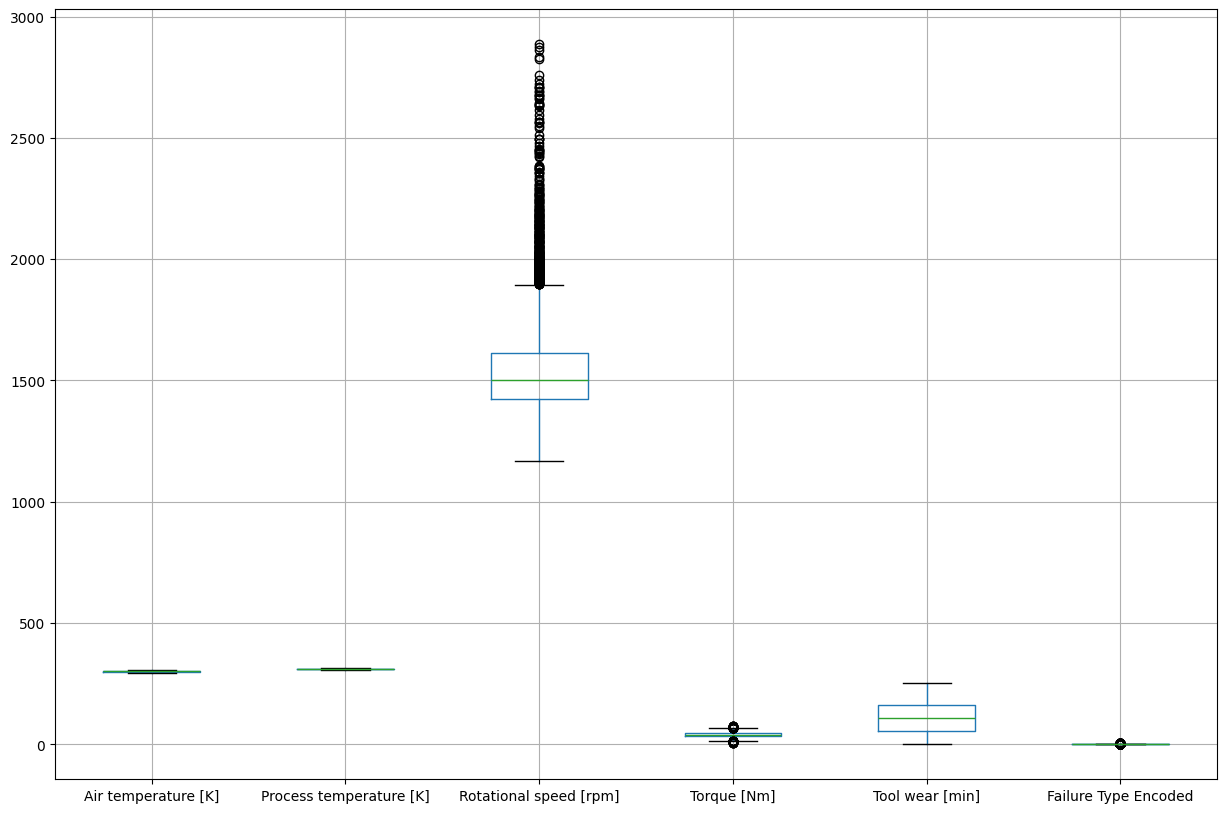

In [75]:
# Boxplot for all variables
df.boxplot(figsize= (15,10))
plt.show()

<Axes: ylabel='Rotational speed [rpm]'>

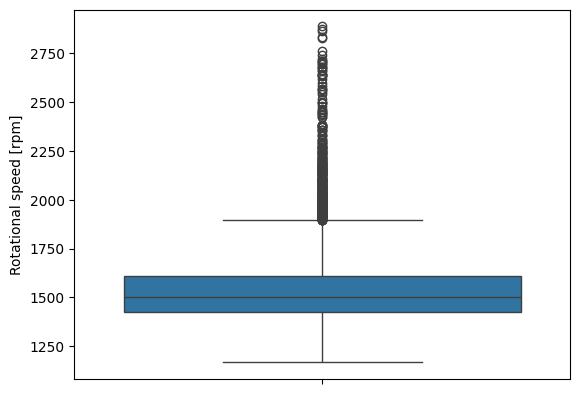

In [76]:
sns.boxplot(df['Rotational speed [rpm]'])

<Axes: xlabel='Rotational speed [rpm]', ylabel='Density'>

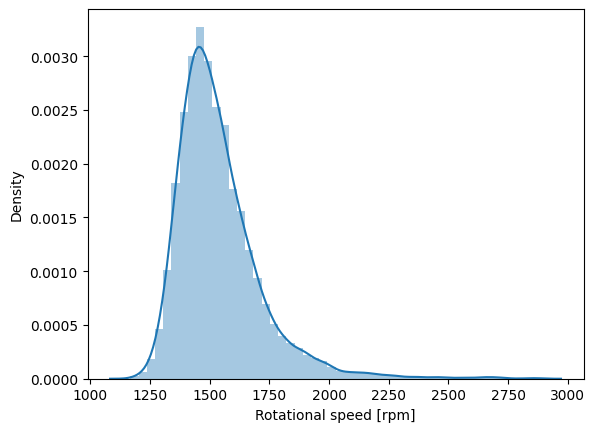

In [77]:
# Skewness of Rotational Speed
sns.distplot(df['Rotational speed [rpm]'])

This Distribution plot looks like Right Skewed

In [78]:
# Skewness value

from scipy.stats import skew

skewness = skew(df['Rotational speed [rpm]'])
print('Skewness: ', skewness)

Skewness:  1.9928720166048546


# Removing Outliers Using IQR Method

In [79]:
q1 = df['Rotational speed [rpm]'].quantile(0.25)
q3 = df['Rotational speed [rpm]'].quantile(0.75)

iqr = q3- q1

In [80]:
lower_limit = q1- 1.5 * iqr
upper_limit = q3 +1.5 * iqr

df = df[(df['Rotational speed [rpm]'] >= lower_limit) &
        (df['Rotational speed [rpm]'] <= upper_limit)]

In [81]:
df.shape

(9582, 8)

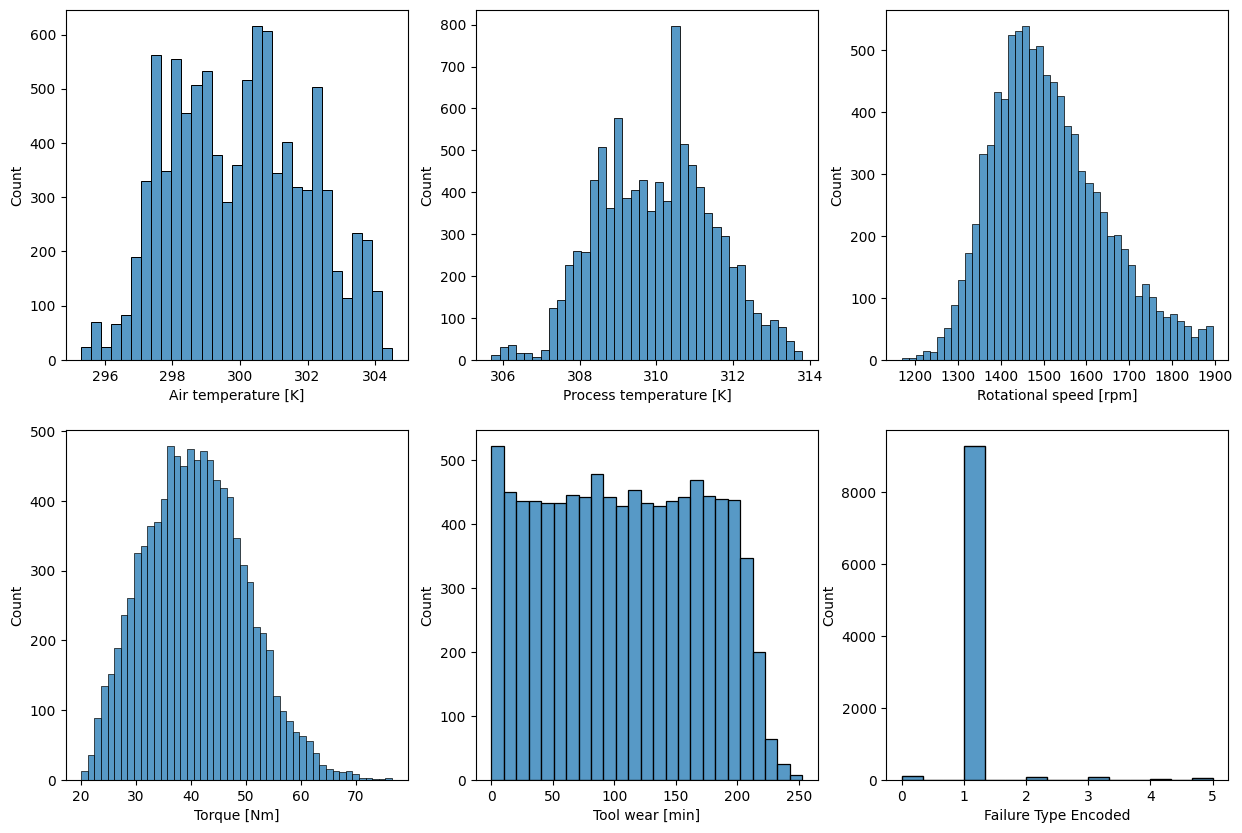

In [82]:
# Pair Plot
plt.figure(figsize= (15,10))

for i, col in  enumerate(num_cols, 1):
    plt.subplot(2,3,i)
    sns.histplot(data= df, x= col)
plt.show()

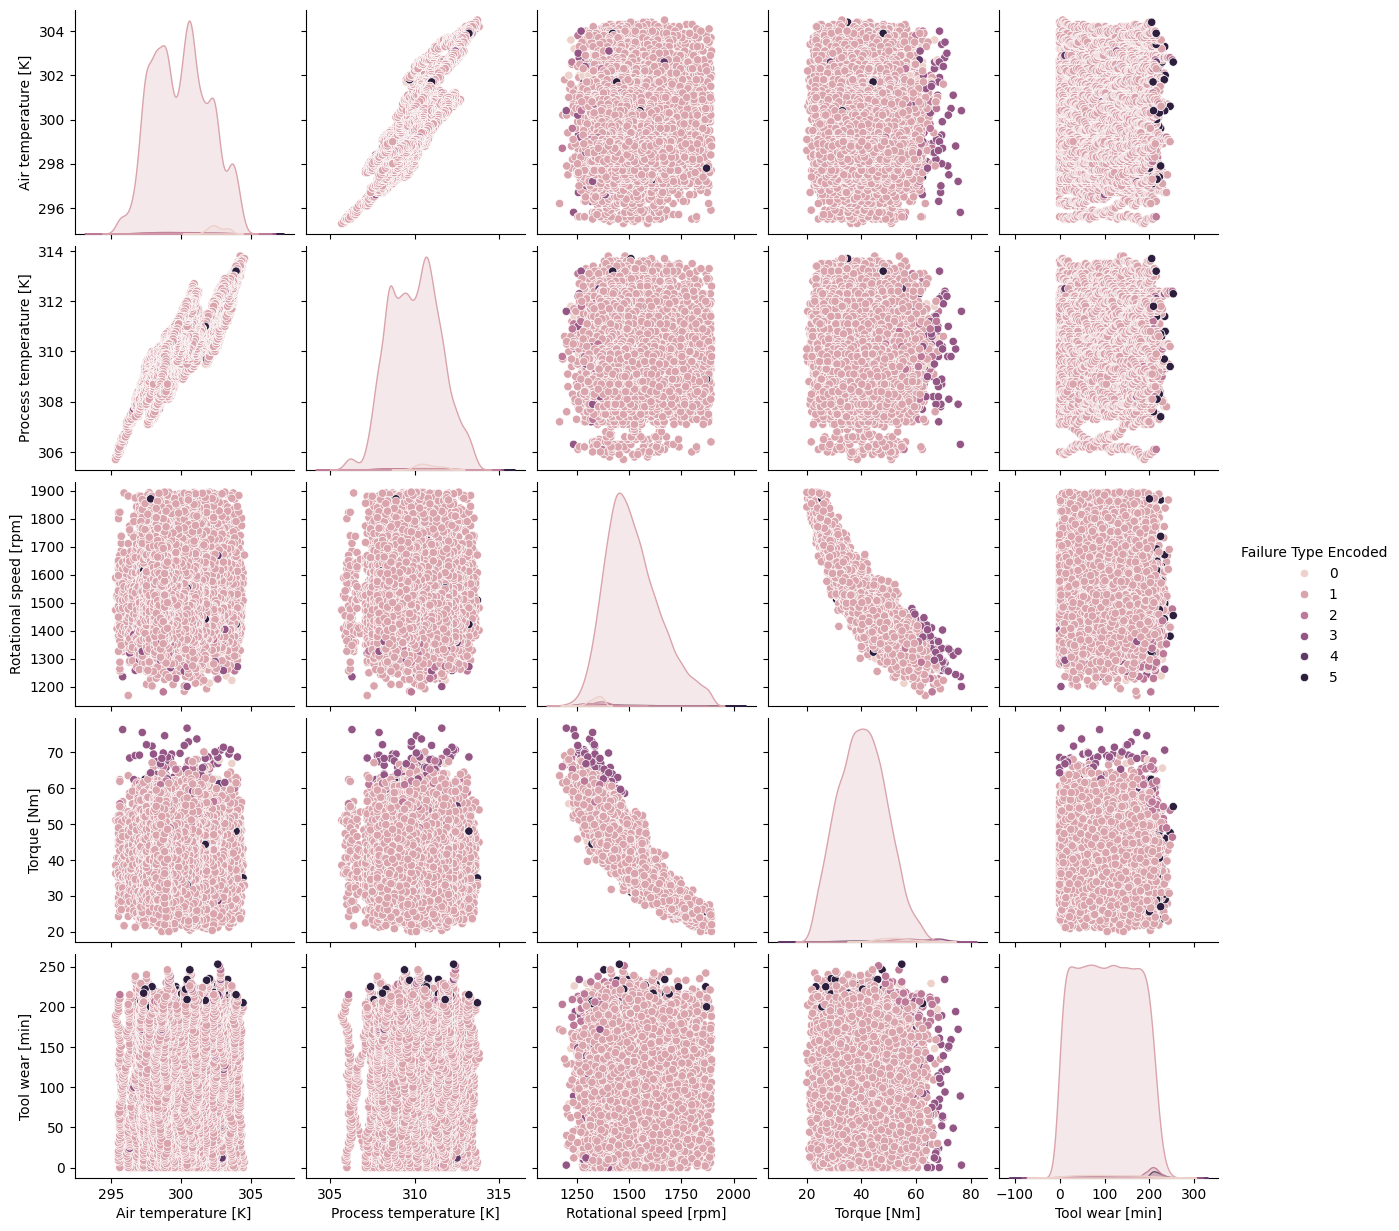

In [83]:
# pairplot
sns.pairplot(df, hue= 'Failure Type Encoded')
plt.show()

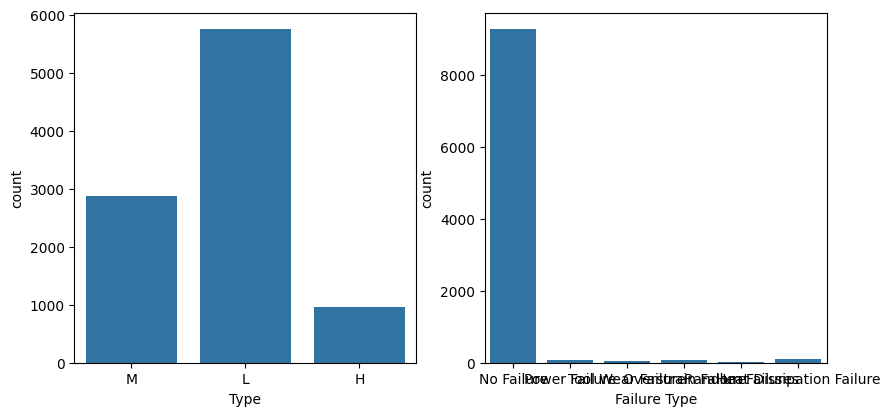

In [84]:
plt.figure(figsize= (15,10))

for i, col in  enumerate(cat_cols, 1):
    plt.subplot(2,3,i)
    sns.countplot(data= df, x= col)
plt.show()

<Axes: >

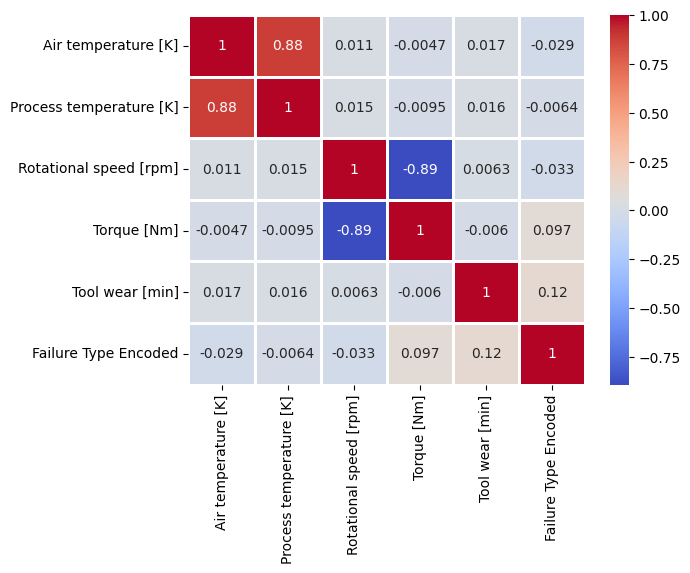

In [85]:
sns.heatmap(df.corr(numeric_only= True), annot= True, cmap= 'coolwarm', linewidths=2)

In [86]:
# Preparing data for model Training

x= df.drop(['Failure Type Encoded', 'Failure Type'], axis= 1)
y= df['Failure Type Encoded']

In [87]:

from sklearn.model_selection import train_test_split

In [88]:
# Splitting Data Into Train and test
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [89]:
# Filtering the Categorical and Numerical Features for the Further Analysis and Operations
cat_cols= X_train.select_dtypes(include= "O").columns.tolist()
num_cols= X_train.select_dtypes(exclude= "O").columns.tolist()

In [90]:
cat_cols

['Type']

In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [92]:
# Column Transformation For the Numerical and categorical features
enc= OneHotEncoder(handle_unknown= 'ignore')
sc= StandardScaler()

ct= ColumnTransformer(
        [
            ('encoding', enc, cat_cols),
            ('scaling', sc, num_cols)
        ]
)

In [93]:
X_train= ct.fit_transform(X_train)
X_test = ct.transform(X_test)

# Logistic Regression Model

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
# Fit the Modle on train data
clf= LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [96]:
y_pred= clf.predict(X_test)

In [97]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.42      0.57        24
           1       0.98      1.00      0.99      1851
           2       0.88      0.54      0.67        13
           3       1.00      0.80      0.89        15
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        12

    accuracy                           0.98      1917
   macro avg       0.63      0.46      0.52      1917
weighted avg       0.97      0.98      0.97      1917



In [99]:
Logistic = accuracy_score(y_test, y_pred)
print('Logistic Regession: ', Logistic)

Logistic Regession:  0.9801773604590506


In [100]:
confusion_matrix(y_test, y_pred)

array([[  10,   14,    0,    0,    0,    0],
       [   1, 1850,    0,    0,    0,    0],
       [   0,    6,    7,    0,    0,    0],
       [   0,    2,    1,   12,    0,    0],
       [   0,    2,    0,    0,    0,    0],
       [   0,   12,    0,    0,    0,    0]], dtype=int64)

In [101]:
# Assuming your model has a predict_proba method
# First, you need to define and train your model here, for example:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)  # Replace X_train and y_train with your training data

y_pred_proba = model.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba, multi_class='ovo')

0.8713359260644512

ROC AUC Score: 0.8713359260644512


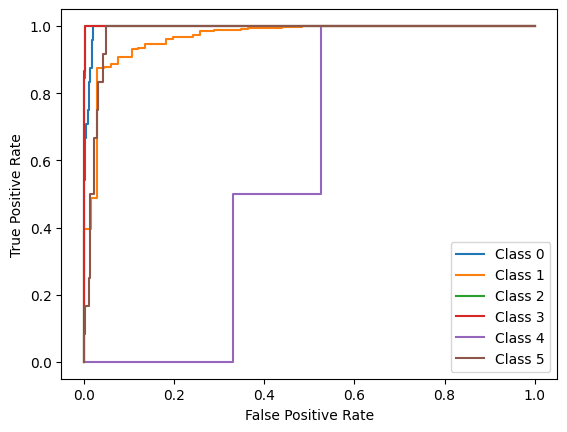

In [102]:
# Assuming your model has a predict_proba method
# First, you need to define and train your model here, for example:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)  # Replace X_train and y_train with your training data

# Get probability estimates for each class
y_pred_proba = model.predict_proba(X_test)

# Compute ROC AUC score for multiclass
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo')
print("ROC AUC Score:", roc_auc)

# For plotting ROC curves in multiclass, you'll need to
# iterate over each class and treat it as a binary problem
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

plt.figure()

for i in range(y_pred_proba.shape[1]):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    plt.plot(fpr, tpr, label=f'Class {i}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [103]:
# Train data Analysis For Logistic Regression

In [104]:
y_pred_t= clf.predict(X_train)

In [105]:
print(classification_report(y_train, y_pred_t))

              precision    recall  f1-score   support

           0       0.84      0.41      0.55        88
           1       0.98      1.00      0.99      7418
           2       0.83      0.58      0.68        65
           3       0.94      0.65      0.77        49
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        29

    accuracy                           0.98      7665
   macro avg       0.60      0.44      0.50      7665
weighted avg       0.97      0.98      0.98      7665



In [106]:
accuracy_score(y_train, y_pred_t)

0.9805609915198956

In [107]:
confusion_matrix(y_train,y_pred_t)

array([[  36,   49,    3,    0,    0,    0],
       [   6, 7410,    0,    2,    0,    0],
       [   1,   26,   38,    0,    0,    0],
       [   0,   13,    4,   32,    0,    0],
       [   0,   16,    0,    0,    0,    0],
       [   0,   28,    1,    0,    0,    0]], dtype=int64)

# Support Vector MAchines

In [108]:
from sklearn.svm import SVC

In [109]:
svm= SVC()

In [110]:
svm.fit(X_train,y_train)

SVC()

In [111]:
y_pred_svm= svm.predict(X_test)

In [112]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.08      0.15        24
           1       0.97      1.00      0.99      1851
           2       0.75      0.46      0.57        13
           3       1.00      0.53      0.70        15
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        12

    accuracy                           0.97      1917
   macro avg       0.62      0.35      0.40      1917
weighted avg       0.97      0.97      0.96      1917



In [113]:
SVM =accuracy_score(y_test, y_pred_svm)
print('SVM :', SVM)

SVM : 0.9739175795513824


In [114]:
confusion_matrix(y_test, y_pred_svm)

array([[   2,   22,    0,    0,    0,    0],
       [   0, 1851,    0,    0,    0,    0],
       [   0,    7,    6,    0,    0,    0],
       [   0,    5,    2,    8,    0,    0],
       [   0,    2,    0,    0,    0,    0],
       [   0,   12,    0,    0,    0,    0]], dtype=int64)

In [115]:
# Initialize the SVM model with probability estimation enabled
svm = SVC(probability=True)

# Fit the model to your training data (assuming you have X_train and y_train)
svm.fit(X_train, y_train)

# Now you can use predict_proba
y_pred_proba_svm = svm.predict_proba(X_test)  # Get predicted probabilities
roc_auc_score(y_test, y_pred_proba_svm, multi_class='ovo')

0.8132010936569284

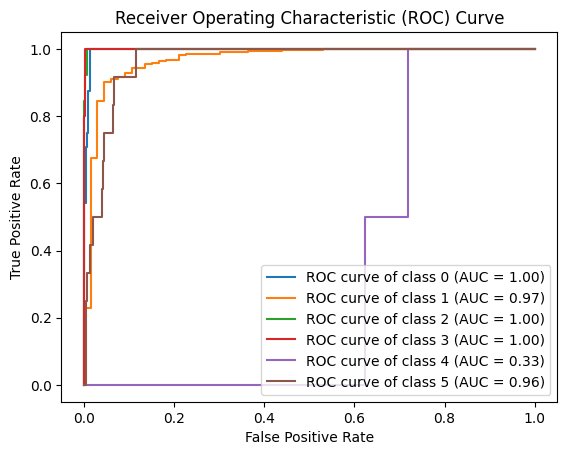

In [116]:
# Import necessary library
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc # Import auc function

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calculate probabilities for each class
y_pred_proba_svm = svm.predict_proba(X_test)

# Determine the number of classes
n_classes = y_test_bin.shape[1]  # Get number of classes from binarized labels

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_bin[:, i], y_pred_proba_svm[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i]) # Now auc is defined and can be used

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [117]:
# Train data

In [118]:
y_pred_svmt = svm.predict(X_train)

In [119]:
print(classification_report(y_train, y_pred_svmt))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29        88
           1       0.98      1.00      0.99      7418
           2       0.82      0.49      0.62        65
           3       1.00      0.53      0.69        49
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        29

    accuracy                           0.98      7665
   macro avg       0.63      0.37      0.43      7665
weighted avg       0.97      0.98      0.97      7665



In [120]:
accuracy_score(y_train, y_pred_svmt)

0.9772994129158513

In [121]:
confusion_matrix(y_train, y_pred_svmt)

array([[  15,   70,    3,    0,    0,    0],
       [   0, 7418,    0,    0,    0,    0],
       [   0,   33,   32,    0,    0,    0],
       [   0,   19,    4,   26,    0,    0],
       [   0,   16,    0,    0,    0,    0],
       [   0,   29,    0,    0,    0,    0]], dtype=int64)

In [122]:
y_pred_proba_svmt = svm.predict_proba(X_train)  # Get predicted probabilities
roc_auc_score(y_train, y_pred_proba_svmt, multi_class='ovr')  # Use probabilities

0.9860260893806991

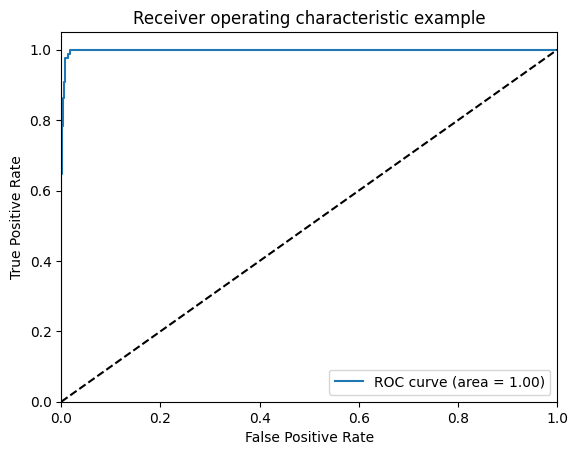

In [123]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
n_classes = y_train_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_pred_proba_svmt[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class (example for class 0)
plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# SVM Model with RBF Kernel

In [124]:
rbf= SVC(kernel= 'rbf')

In [125]:
rbf.fit(X_train, y_train)

SVC()

In [126]:
y_rbf = rbf.predict(X_test)

In [127]:
print(classification_report(y_test, y_rbf))

              precision    recall  f1-score   support

           0       1.00      0.08      0.15        24
           1       0.97      1.00      0.99      1851
           2       0.75      0.46      0.57        13
           3       1.00      0.53      0.70        15
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        12

    accuracy                           0.97      1917
   macro avg       0.62      0.35      0.40      1917
weighted avg       0.97      0.97      0.96      1917



In [128]:
svm_rbf= accuracy_score(y_test, y_rbf)
print('SVM Modle with RBF Kernel: ', svm_rbf)

SVM Modle with RBF Kernel:  0.9739175795513824


In [129]:
confusion_matrix(y_test, y_rbf)

array([[   2,   22,    0,    0,    0,    0],
       [   0, 1851,    0,    0,    0,    0],
       [   0,    7,    6,    0,    0,    0],
       [   0,    5,    2,    8,    0,    0],
       [   0,    2,    0,    0,    0,    0],
       [   0,   12,    0,    0,    0,    0]], dtype=int64)

In [130]:
# Import necessary library
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC

# Assuming 'X_train' and 'y_train' are available from previous steps
rbf = SVC(probability=True)  # Initialize with probability=True
rbf.fit(X_train, y_train)  # Train the model

# Get probabilities instead of class labels
y_rbf_probs = rbf.predict_proba(X_test)

# Calculate ROC AUC score, handling multi-class with 'ovo' or 'ovr'
roc_auc_score(y_test, y_rbf_probs, multi_class='ovo')  # Or use 'ovr'

0.8187659592643385

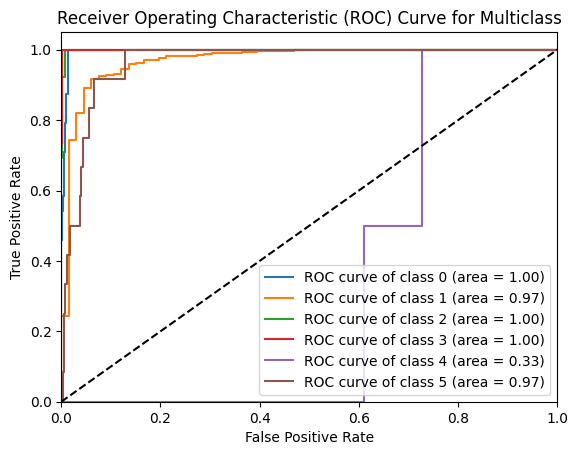

In [131]:
# Import necessary library
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming 'X_train', 'X_test', 'y_train', and 'y_test' are available from previous steps
rbf = SVC(probability=True)  # Initialize with probability=True
rbf.fit(X_train, y_train)  # Train the model

# Get probabilities for each class
y_rbf_probs = rbf.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_rbf_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()

In [132]:
# Train data

In [133]:
y_rbft= rbf.predict(X_train)

In [134]:
print(classification_report(y_train, y_rbft))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29        88
           1       0.98      1.00      0.99      7418
           2       0.82      0.49      0.62        65
           3       1.00      0.53      0.69        49
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        29

    accuracy                           0.98      7665
   macro avg       0.63      0.37      0.43      7665
weighted avg       0.97      0.98      0.97      7665



In [135]:
accuracy_score(y_train, y_rbft)

0.9772994129158513

In [136]:
confusion_matrix(y_train, y_rbft)

array([[  15,   70,    3,    0,    0,    0],
       [   0, 7418,    0,    0,    0,    0],
       [   0,   33,   32,    0,    0,    0],
       [   0,   19,    4,   26,    0,    0],
       [   0,   16,    0,    0,    0,    0],
       [   0,   29,    0,    0,    0,    0]], dtype=int64)

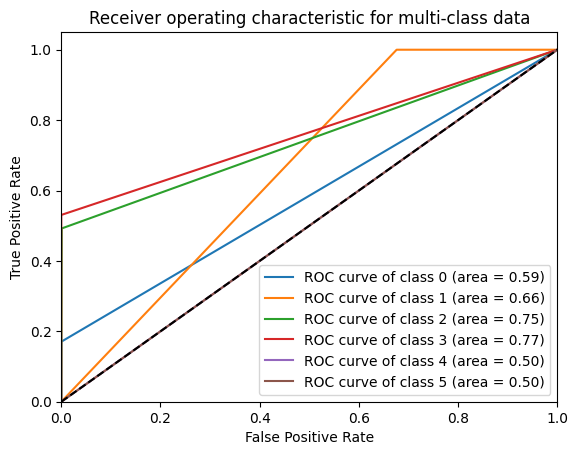

In [137]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_rbft_bin = label_binarize(y_rbft, classes=np.unique(y_train))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_rbft_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

# Decision Tree

In [138]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
tree= DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [140]:
y_tree= tree.predict(X_test)

In [141]:
print(classification_report(y_test, y_tree))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        24
           1       0.99      0.99      0.99      1851
           2       0.53      0.69      0.60        13
           3       0.85      0.73      0.79        15
           4       0.00      0.00      0.00         2
           5       0.07      0.08      0.08        12

    accuracy                           0.97      1917
   macro avg       0.57      0.53      0.55      1917
weighted avg       0.98      0.97      0.97      1917



In [142]:
decision_tree= accuracy_score(y_test, y_tree)
print('Decision Tree: ', decision_tree)

Decision Tree:  0.9739175795513824


In [143]:
confusion_matrix(y_test, y_tree)

array([[  17,    7,    0,    0,    0,    0],
       [   0, 1829,    5,    2,    3,   12],
       [   0,    3,    9,    0,    0,    1],
       [   0,    2,    2,   11,    0,    0],
       [   0,    2,    0,    0,    0,    0],
       [   0,   10,    1,    0,    0,    1]], dtype=int64)

In [144]:
y_tree_proba = tree.predict_proba(X_test)  # Get predicted probabilities
roc_auc_score(y_test, y_tree_proba, multi_class='ovo')  # Calculate ROC AUC

0.7205422224992727

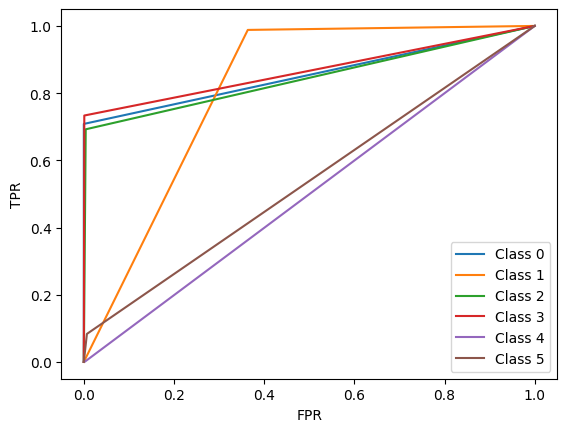

In [145]:
# Assuming 'tree' is your trained decision tree model
y_tree_proba = tree.predict_proba(X_test)

# Iterate over each class and plot ROC curve
for i in range(y_tree_proba.shape[1]):
    fpr, tpr, _ = roc_curve(y_test, y_tree_proba[:, i], pos_label=i)
    plt.plot(fpr, tpr, label=f'Class {i}')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [146]:
# Train Data

In [147]:
y_treet= tree.predict(X_train)

In [148]:
print(classification_report(y_train, y_treet))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00      7418
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00        49
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        29

    accuracy                           1.00      7665
   macro avg       1.00      1.00      1.00      7665
weighted avg       1.00      1.00      1.00      7665



In [149]:
accuracy_score(y_train, y_treet)

1.0

In [150]:
confusion_matrix(y_train, y_treet)

array([[  88,    0,    0,    0,    0,    0],
       [   0, 7418,    0,    0,    0,    0],
       [   0,    0,   65,    0,    0,    0],
       [   0,    0,    0,   49,    0,    0],
       [   0,    0,    0,    0,   16,    0],
       [   0,    0,    0,    0,    0,   29]], dtype=int64)

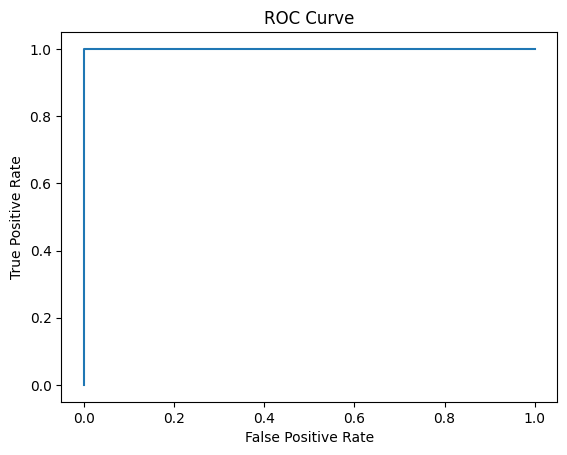

In [151]:
# Import necessary library
from sklearn.preprocessing import label_binarize

# Binarize the output
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_treet_bin = label_binarize(y_treet, classes=np.unique(y_treet))

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
for i in range(y_train_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_treet_bin[:, i])

# Plot ROC curves for each class (example for the first class)
plt.plot(fpr[0], tpr[0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

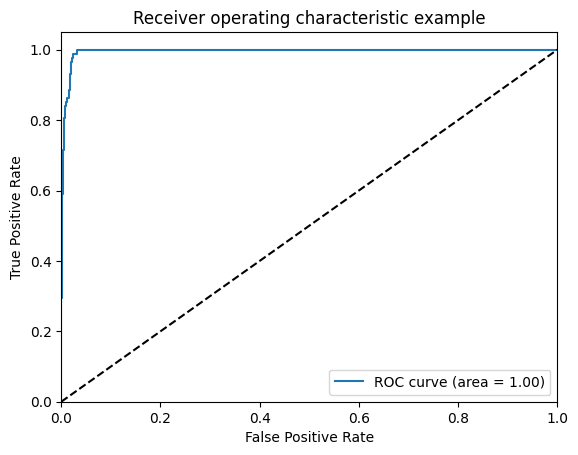

Macro-average ROC AUC score: 0.9405122259330766


In [152]:
# Import necessary library
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_treet contains predicted class labels, not probabilities
# Replace this with your actual model prediction method if it outputs probabilities
# Example using a hypothetical model 'model'
y_treet_probs = model.predict_proba(X_train)

# Binarize the output
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
# Use predicted probabilities instead of binarized predictions
# y_treet_bin = label_binarize(y_treet, classes=np.unique(y_treet))

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict() # Store AUC scores
for i in range(y_train_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_treet_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i]) # Calculate AUC

# Plot ROC curves for each class (example for the first class)
plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Compute macro-average ROC AUC score
roc_auc_macro = roc_auc_score(y_train, y_treet_probs, multi_class='ovr', average='macro')
print("Macro-average ROC AUC score:", roc_auc_macro)

# Random Forest

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
forest= RandomForestClassifier()

In [155]:
forest.fit(X_train, y_train)

RandomForestClassifier()

In [156]:
y_forest= forest.predict(X_test)


In [157]:
print(classification_report(y_test, y_forest))

              precision    recall  f1-score   support

           0       1.00      0.54      0.70        24
           1       0.98      1.00      0.99      1851
           2       0.88      0.54      0.67        13
           3       1.00      0.60      0.75        15
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        12

    accuracy                           0.98      1917
   macro avg       0.64      0.45      0.52      1917
weighted avg       0.97      0.98      0.98      1917



In [158]:
random_forest = accuracy_score(y_test, y_forest)
print('Random Forest: ', random_forest)

Random Forest:  0.980699008868023


In [159]:
confusion_matrix(y_test, y_forest)

array([[  13,   11,    0,    0,    0,    0],
       [   0, 1851,    0,    0,    0,    0],
       [   0,    6,    7,    0,    0,    0],
       [   0,    5,    1,    9,    0,    0],
       [   0,    2,    0,    0,    0,    0],
       [   0,   12,    0,    0,    0,    0]], dtype=int64)

In [160]:
y_forest_proba = forest.predict_proba(X_test)  # Get predicted probabilities
roc_auc_score(y_test, y_forest_proba, multi_class='ovo')  # Use probabilities in roc_auc_score

0.8640740524295022

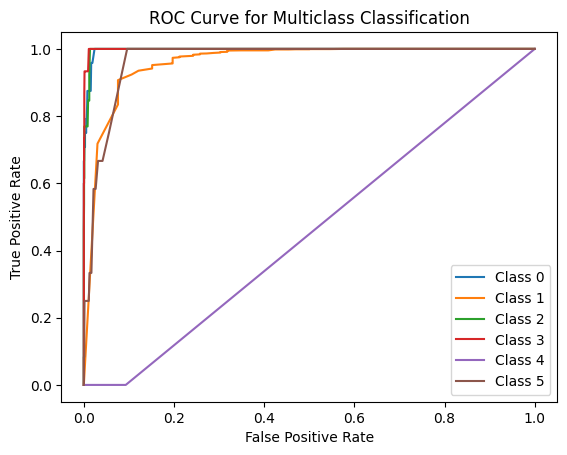

In [161]:
# Assuming 'forest' is your trained RandomForestClassifier and 'X_test' is your test data
y_forest_proba = forest.predict_proba(X_test)

# Iterate over each class and plot ROC curve
for i in range(y_forest_proba.shape[1]):
    fpr, tpr, _ = roc_curve(y_test == i, y_forest_proba[:, i])  # Calculate ROC for each class
    plt.plot(fpr, tpr, label=f'Class {i}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend()
plt.show()

In [162]:
# train data analysis

In [163]:
y_forestt= forest.predict(X_train)

In [164]:
print(classification_report(y_train, y_forestt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00      7418
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00        49
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        29

    accuracy                           1.00      7665
   macro avg       1.00      1.00      1.00      7665
weighted avg       1.00      1.00      1.00      7665



In [165]:
confusion_matrix(y_train, y_forestt)

array([[  88,    0,    0,    0,    0,    0],
       [   0, 7418,    0,    0,    0,    0],
       [   0,    0,   65,    0,    0,    0],
       [   0,    0,    0,   49,    0,    0],
       [   0,    0,    0,    0,   16,    0],
       [   0,    0,    0,    0,    0,   29]], dtype=int64)

# Model Comparision

In [166]:
print('Logistic Regession: ', Logistic)
print('SVM :', SVM)
print('SVM Modle with RBF Kernel: ', svm_rbf)
print('Decision Tree: ', decision_tree)
print('Random Forest: ', random_forest)

Logistic Regession:  0.9801773604590506
SVM : 0.9739175795513824
SVM Modle with RBF Kernel:  0.9739175795513824
Decision Tree:  0.9739175795513824
Random Forest:  0.980699008868023


In [170]:
def get_prediction(model):
  # Get input from the user
  air_temperature = float(input("Enter Air Temperature: "))
  process_temperature = float(input("Enter Process Temperature: "))
  rotational_speed = float(input("Enter Rotational Speed: "))
  torque = float(input("Enter Torque: "))
  tool_wear = float(input("Enter Tool Wear: "))
  type = input("Enter Type: ")


  input_df = pd.DataFrame({
      'Air temperature [K]': [air_temperature],
      'Process temperature [K]': [process_temperature],
      'Rotational speed [rpm]': [rotational_speed],
      'Torque [Nm]': [torque],
      'Tool wear [min]': [tool_wear],
      'Type': [type]
  })
  print(input_df)


  input_transformed = ct.transform(input_df)
  print(input_transformed)

  prediction = model.predict(input_transformed)

  return prediction


prediction = get_prediction(clf)
print(prediction)

   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.8                    308.8                  1461.0   

   Torque [Nm]  Tool wear [min] Type  
0         47.9            206.0    L  
[[ 0.          1.          0.         -0.59664014 -0.81023484 -0.41133458
   0.76763135  1.53407962]]
[1]


In [173]:
from sklearn.pipeline import Pipeline

In [171]:
preprocessor = ColumnTransformer(
    transformers=[
        ('encoding', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('scaling', StandardScaler(), num_cols)
    ]
)

In [180]:
pipeline = Pipeline(steps=[
    ('preprocessor', ct),
    ('classifier', model)
])

In [181]:
import pickle

# pipeline.fit(X_train, y_train)
with open('predictive_maintenance_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [168]:
import pickle

with open('predictive_maintenance_model7.pkl', 'wb') as file:
    pickle.dump(clf, file)